# Homework 3. Mikhail Shadrin

### Task 1. Chi-square test. Use data_games.dta file.

**1.1.** Analyze the relationship between **payment_type** and **payment_method** using Chi-square statistical test. Is the Chi-square test applicable for this pair of variables? If yes, formulate hypotheses, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between these two variables.

In [1]:
import pandas as pd

data = pd.read_stata("data/data_games.dta")
data

,id,pack_id,crystalls_balance_before_buy,crystalls_bought,country,payment,utc_timestamp,payment_type,payment_method
0,2.052791e+09,3.0,0.0,41.0,GB,644.0,1.414842e+09,offer,general
1,1.275033e+09,1.0,10.0,7.0,US,205.0,1.414814e+09,offer,general
2,2.000015e+14,2.0,2.0,14.0,US,514.0,1.414866e+09,regular,general
3,1.119068e+09,4.0,0.0,70.0,GB,1289.0,1.414917e+09,regular,general
4,2.000028e+14,3.0,0.0,30.0,US,1029.0,1.414946e+09,regular,general
...,...,...,...,...,...,...,...,...,...
105502,2.733727e+09,5.0,89.0,180.0,US,3088.0,1.417208e+09,offer,general
105503,3.292330e+09,6.0,190.0,210.0,US,5147.0,1.417295e+09,regular,general
105504,2.000062e+14,1.0,0.0,8.0,FR,205.0,1.417267e+09,offer,general
105505,2.000002e+14,2.0,1.0,14.0,DK,553.0,1.417314e+09,regular,general


To test whether variables `payment_type` and `payment_method` are associated we define the following hypothesis:

**H0:** The variables `payment_type` and `payment_method` are **independent**

**H1:** The variables `payment_type` and `payment_method` are **not independent**

We also choose a significance level $\alpha$ **= 0.05**

In [2]:
print("Payment type distinct values:\n{}\n".format(data.payment_type.value_counts()))
print("Payment method distinct values:\n{}".format(data.payment_method.value_counts()))

Payment type distinct values:
regular    91668
offer      13839
Name: payment_type, dtype: int64

Payment method distinct values:
general         103278
mobile            1673
fb_promotion       498
giftcard            58
Name: payment_method, dtype: int64


In [3]:
tab = pd.crosstab(data.payment_type, data.payment_method)
tab

payment_method,fb_promotion,general,giftcard,mobile
payment_type,,,,
offer,0,13538,0,301
regular,498,89740,58,1372


Since the number of dimensions for the table is 2, we can apply Chi^2 test

In [4]:
from scipy.stats import chi2_contingency

alpha = 0.05
stat, p_value, dof, expected = chi2_contingency(tab)
print('Significance={}, p-value={}'.format(alpha, p_value))

if p_value <= alpha:
    print('Variables are not independent. Reject H0. Accept H1')
else:
    print('Variables are independent. Do not reject H0')

Significance=0.05, p-value=1.3763184420685322e-25
Variables are not independent. Reject H0. Accept H1


In [5]:
import matplotlib.pyplot as plt

tab.plot.bar(log=True)

We can see that these variables are slightly associated in terms of absence of `fb_promotion` and `giftcard` payment types for `offer` payment method

**1.2.** Analyze the relationship between **payment_type** and **crystalls_balance_before_buy** using Chi-square statistical test. Is the Chi-square test applicable for this pair of variables? If yes, formulate hypotheses, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between these two variables.

The Chi-square cannot be applied since the variables are numeric and categorical.

---

### Task 2. Scatterplot. Normality test. Correlation. Use data_games.dta file.

**2.1.** Create a scatterplot between **crystalls_balance_before_buy** and **payment**. Copy the scatterplot into this file.

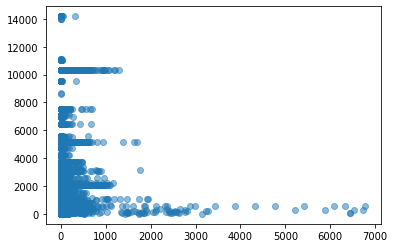

In [6]:
plt.scatter(data.crystalls_balance_before_buy, data.payment,  alpha = 0.5)
plt.show()

**2.2.** Run the suitable normality test to conclude whether the distribution of **payment** variable is significantly different from the normal. Formulate hypothesis. Make conclusions.

According to resluts in task 1.1 the sample's size equals to 105507, which is much greater than 100.
Since, _Shapiro-Wilks test_ is not suitable, _Kolmogorov-Smirnov_ normality test is applicable.

We define the following hypothesis:

H0: Distribution of variable `payment` is **not significantly different** from normal distribution.

H1: Distribution of variable `payment` is **significantly different** from normal distribution.

In [7]:
from scipy.stats import kstest

alpha = 0.05
p_value = kstest(data.payment, 'norm').pvalue
print('p-value: {}'.format(p_value))

if p_value <= alpha:
    print('Reject H0. Distribution of variable payment is significantly different from normal distribution')
else:
    print('Do not reject H0. Distribution of variable payment is not significantly different from normal distribution')

p-value: 0.0
Reject H0. Distribution of variable payment is significantly different from normal distribution


Calculate an appropriate correlation coefficient between three pairs of variables. Fill in the table below. Interpret the results.


| Variables | Type of the appropriate correlation coefficient | Hypotheses | Strength of the relationship | Direction of the relationship | Significance of the relationship |
|:---|:---:|:---:|:---:|:---:|:---:|
| crystalls_balance_before_buy and payment | Spearman | H0: variables are independent | Very weak | Positive | 0.01 |
| crystalls_balance_before_buy and crystalls_bought | Kendall | H0: variables are independent | Very weak | Positive | 0.01 |
| crystalls_bought and payment | Pearson | H0: variables are independent | Strong | Positive | 0.01 |

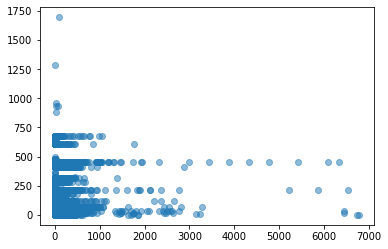

In [8]:
print(plt.scatter(data.crystalls_balance_before_buy, data.crystalls_bought, alpha = 0.5))

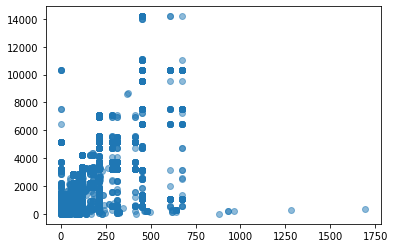

In [9]:
print(plt.scatter(data.crystalls_bought, data.payment, alpha = 0.5))

From the plots above we can see:

- `crystalls_balance_before_buy` and `payment` are distributed ordinarly and have significant number of ranks, so **Spearman's** correlation can be applied for this case
- `crystalls_balance_before_buy` and `crystalls_bought` are distributed ordinarly and ranks are tied closely, so **Kendalls's** correlation can be applied for this case
- `crystalls_bought` and `payment` are distributed ordinarly, but the number of ranks is quite the same, moreover, we can see some kind of linear relation, so the **Pearson's** correlation can be applied for this case

In [10]:
from scipy.stats import pearsonr, spearmanr, kendalltau

spear = spearmanr(data.crystalls_balance_before_buy, data.payment)
kendal = kendalltau(data.crystalls_balance_before_buy, data.crystalls_bought)
pearson = pearsonr(data.crystalls_bought, data.payment)

print("Spearman corr = {}, p-value = {}".format(spear[0], spear[1]))
print("Kendal corr = {}, p-value = {}".format(kendal[0], kendal[1]))
print("Pearson corr = {}, p-value = {}".format(pearson[0], pearson[1]))

Spearman corr = 0.1457859347733024, p-value = 0.0
Kendal corr = 0.11117243493392964, p-value = 0.0
Pearson corr = 0.85114580317308, p-value = 0.0


Distinguishing of these results may be found in the table above

---

### Task 3. Partial correlation. Use health_funding.dta file.

Calculate paired correlation coefficient between **funding** and **disease** variables. Now calculate the correlation coefficient between the same pair of variables controlling for the number of visits (**visits** variable). Interpret the results of analysis.

In [11]:
data = pd.read_stata('data/health_funding.dta')
data

,funding,disease,visits,citycode
0,155.330002,158.339996,152.130005,6.0
1,177.339996,157.229996,167.839996,27.0
2,165.089996,162.919998,162.210007,15.0
3,154.279999,130.589996,146.690002,4.0
4,185.559998,202.809998,186.929993,36.0
5,186.960007,221.429993,188.160004,37.0
6,198.630005,189.220001,195.389999,49.0
7,172.139999,166.419998,175.500000,21.0
8,198.250000,203.070007,197.039993,48.0
9,193.899994,198.570007,190.160004,44.0


In [12]:
import pingouin as pg

partial_correlation = pearsonr(data.funding, data.disease)[0]
print('Pearsons correlation between funding and disease: {}'.format(partial_correlation))

partial_correlation_with_control = pg.partial_corr(data=data, x='funding', y='disease', covar=['visits']).r
print('Pearsons correlation between funding and disease controlling the number of visits: {}'.format(partial_correlation_with_control))

Pearsons correlation between funding and disease: 0.73708715607246
Pearsons correlation between funding and disease controlling the number of visits: pearson    0.013
Name: r, dtype: float64


---

### Task 4. T-tests and Nonparametric tests.

**4.1.** Use **auto.dta** file (example datasets). Select an appropriate test to check if there is a difference in the mean length of foreign and non-foreign cars. Explain you selection. Formulate the hypotheses. Interpret the results of analysis. 

In [13]:
data = pd.read_stata('data/auto.dta')
data

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign


In [14]:
data.foreign.unique()

[Domestic, Foreign]
Categories (2, object): [Domestic < Foreign]

Since there are only 2 categorical variables, we can apply a two-sided t-test for the null hypothesis that 2 independent samples have identical average (expected) values

In [15]:
from scipy.stats import ttest_ind

t_test_stat, p_value = ttest_ind(data[data.foreign == 'Domestic'].length, data[data.foreign == 'Foreign'].length)
print('T-test stat: {}, p-value: {}'.format(t_test_stat, p_value))

alpha = 0.05
if p_value <= alpha:
    print('Reject H0. The mean length of foreign and non-foreign cars are not the same')
else:
    print('Do not reject H0. The mean length of foreign and non-foreign cars are the same')

T-test stat: 5.88952204179086, p-value: 1.1384851762016045e-07
Reject H0. The mean length of foreign and non-foreign cars are not the same


**4.2.** Use **data_games.dta** file. Select an appropriate test to understand whether there is a difference in payments between the people who have used different payment types. Explain you selection. Formulate the hypotheses. Interpret the results of analysis. 

In [21]:
data = pd.read_stata("data/data_games.dta")
data.payment_type.unique()

[offer, regular]
Categories (2, object): [offer < regular]

Since there are only 2 categorical variables, we can apply a two-sided t-test for the null hypothesis that 2 independent samples have identical average (expected) values

In [22]:
t_test_stat, p_value = ttest_ind(data[data.payment_type == 'offer'].payment, data[data.payment_type == 'regular'].payment)
print('T-test stat: {}, p-value: {}'.format(t_test_stat, p_value))

alpha = 0.05
if p_value <= alpha:
    print('Reject H0. There is a difference in payments between the people who have used different payment types')
else:
    print('Do not reject H0. There is no difference in payments between the people who have used different payment types')

T-test stat: 2.9069783585108384, p-value: 0.003650143931138443
Reject H0. There is a difference in payments between the people who have used different payment types


**4.3.** Use **data_games.dta** file. Select an appropriate test to understand whether there is a difference in payments between the people who have used different payment methods. Explain you selection. Formulate the hypotheses. Interpret the results of analysis.

In [23]:
data.payment_method.unique()

[general, mobile, fb_promotion, giftcard]
Categories (4, object): [fb_promotion < general < giftcard < mobile]

Since there are 4 values for categorical variable `payment_method`, we can apply Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal

In [24]:
from scipy.stats import kruskal

kruskal_stat, p_value = kruskal(data[data.payment_method == 'fb_promotion'].payment,
                                data[data.payment_method == 'general'].payment,
                                data[data.payment_method == 'giftcard'].payment,
                                data[data.payment_method == 'mobile'].payment)
print('Kruskal-Wallis-test stat: {}, p-value: {}'.format(kruskal_stat, p_value))

alpha = 0.05
if p_value <= alpha:
    print('Reject H0. There is a difference in payments between the people who have used different payment methods')
else:
    print('Do not reject H0. There is no difference in payments between the people who have used different payment methods')


Kruskal-Wallis-test stat: -2355820.8772698985, p-value: 1.0
Do not reject H0. There is no difference in payments between the people who have used different payment methods
